**Data Preprocessing for SVM Based Depression Prediction Model**

***1.Import Required Libraries***

In [457]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split


***2.Load the Dataset***

In [458]:
#Load the dataset
#file_path = os.path.join(os.getcwd(), "Data", "raw", "student_depression_dataset.csv")
#df = pd.read_csv(file_path)

raw_df=pd.read_csv("./Data/raw/student_depression_dataset.csv")

In [459]:
#Make a copy to avoid modifying original
df=raw_df.copy()
print(f"Original shape:{df.shape}")

Original shape:(27901, 18)


In [460]:
#Preview the data
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


***3. Standardize Column Names***

In [461]:
df.columns=[col.strip().lower().replace(" ", "_").replace("/", "_").replace("?", "").rstrip("_") for col in df.columns]

***4.Inspect the Dataset***

In [462]:
# Print basic info about the dataset
print(f"Information of the dataset \n -------------------------------------------\n")
df.info()

Information of the dataset 
 -------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   27901 non-null  int64  
 1   gender                               27901 non-null  object 
 2   age                                  27901 non-null  float64
 3   city                                 27901 non-null  object 
 4   profession                           27901 non-null  object 
 5   academic_pressure                    27901 non-null  float64
 6   work_pressure                        27901 non-null  float64
 7   cgpa                                 27901 non-null  float64
 8   study_satisfaction                   27901 non-null  float64
 9   job_satisfaction                     27901 non-null  float64
 10  sleep_duration      

In [463]:
#Summary Statistics for numerical columns
print(f"Summary Statistics:\n -------------------------------------------\n")
print(df.describe())

Summary Statistics:
 -------------------------------------------

                  id           age  academic_pressure  work_pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               cgpa  study_satisfaction  job_satisfaction  work_study_hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148         

In [464]:
print(df.columns.tolist())


['id', 'gender', 'age', 'city', 'profession', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts', 'work_study_hours', 'financial_stress', 'family_history_of_mental_illness', 'depression']


***5. Replace common invalid strings with NaN***

In [465]:
#Replace common invalid/missing string indicators with np.nan
invalid_strings=['NA','N/A','null','others','?','',' ']
df.replace(invalid_strings, np.nan, inplace=True)


***6. Convert specific columns to numeric***

In [466]:
#Convert some columns to numeric forcing errors to NaN
df['financial_stress']=pd.to_numeric(df['financial_stress'],errors='coerce')
df['cgpa']=pd.to_numeric(df['cgpa'],errors='coerce')


***7. Check whether there are missing values in the dataset***

In [467]:
#Check missing values
print("Missing values in each Column:\n")
print(df.isnull().sum())

Missing values in each Column:

id                                     0
gender                                 0
age                                    0
city                                   0
profession                             0
academic_pressure                      0
work_pressure                          0
cgpa                                   0
study_satisfaction                     0
job_satisfaction                       0
sleep_duration                         0
dietary_habits                         0
degree                                 0
have_you_ever_had_suicidal_thoughts    0
work_study_hours                       0
financial_stress                       3
family_history_of_mental_illness       0
depression                             0
dtype: int64


***8.Check whether there are duplicates in the dataset***

In [468]:
print("Duplicates before drop:",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after drop:",df.duplicated().sum())

print(f"Data shape after cleaning:{df.shape}")

Duplicates before drop: 0
Duplicates after drop: 0
Data shape after cleaning:(27901, 18)


***9.Drop Irrelevant Columns***

In [469]:
irrelevant_cols=['id', 'city','work_pressure','job_satisfaction']
cols_to_drop=[col for col in irrelevant_cols if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)
print(f"Shape after dropping irrelevant columns:{df.shape}")


Shape after dropping irrelevant columns:(27901, 14)


In [470]:
#Drop Rows with Invalid Categorical Values
df['sleep_duration']=df['sleep_duration'].replace('Others', np.nan)
df['dietary_habits']=df['dietary_habits'].replace('Others', np.nan)
df['financial_stress']=df['financial_stress'].replace('?', np.nan)

df.dropna(subset=['sleep_duration','dietary_habits','financial_stress'],inplace=True)

In [471]:
#Remove Outlier Ages (Keep students/youth only)
df['age']=pd.to_numeric(df['age'],errors='coerce')
df=df[df['age']<35]

***10.Identify Feature Types***

In [472]:
#Target Variable/column
target='depression'

#Feature columns(excluding target)
features=df.drop(columns=[target])

#Categorical Features
categorical_cols=features.select_dtypes(include='object').columns.tolist()

#Numerical Features
numerical_cols=features.select_dtypes(exclude='object').columns.tolist()

print("Categorical:",categorical_cols)
print("Numerical:",numerical_cols)

Categorical: ['gender', 'profession', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts', 'family_history_of_mental_illness']
Numerical: ['age', 'academic_pressure', 'cgpa', 'study_satisfaction', 'work_study_hours', 'financial_stress']


***11. Exploratory Dta Analysis(EDA)***

*11.1 Target Variable Distribution*

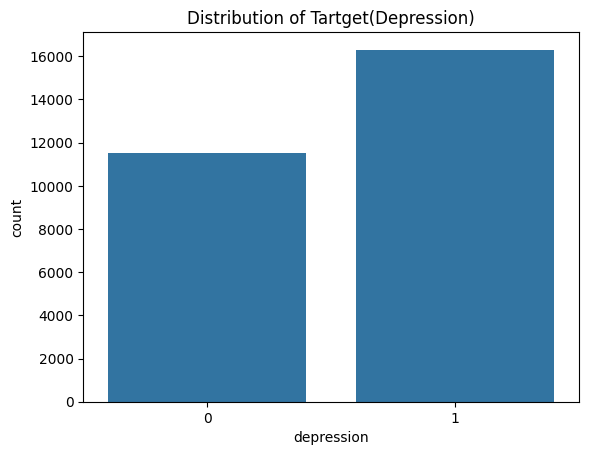

In [473]:
sns.countplot(x=df[target])
plt.title("Distribution of Tartget(Depression)")
plt.show()

*11.2 Distribution of Numerical Features*

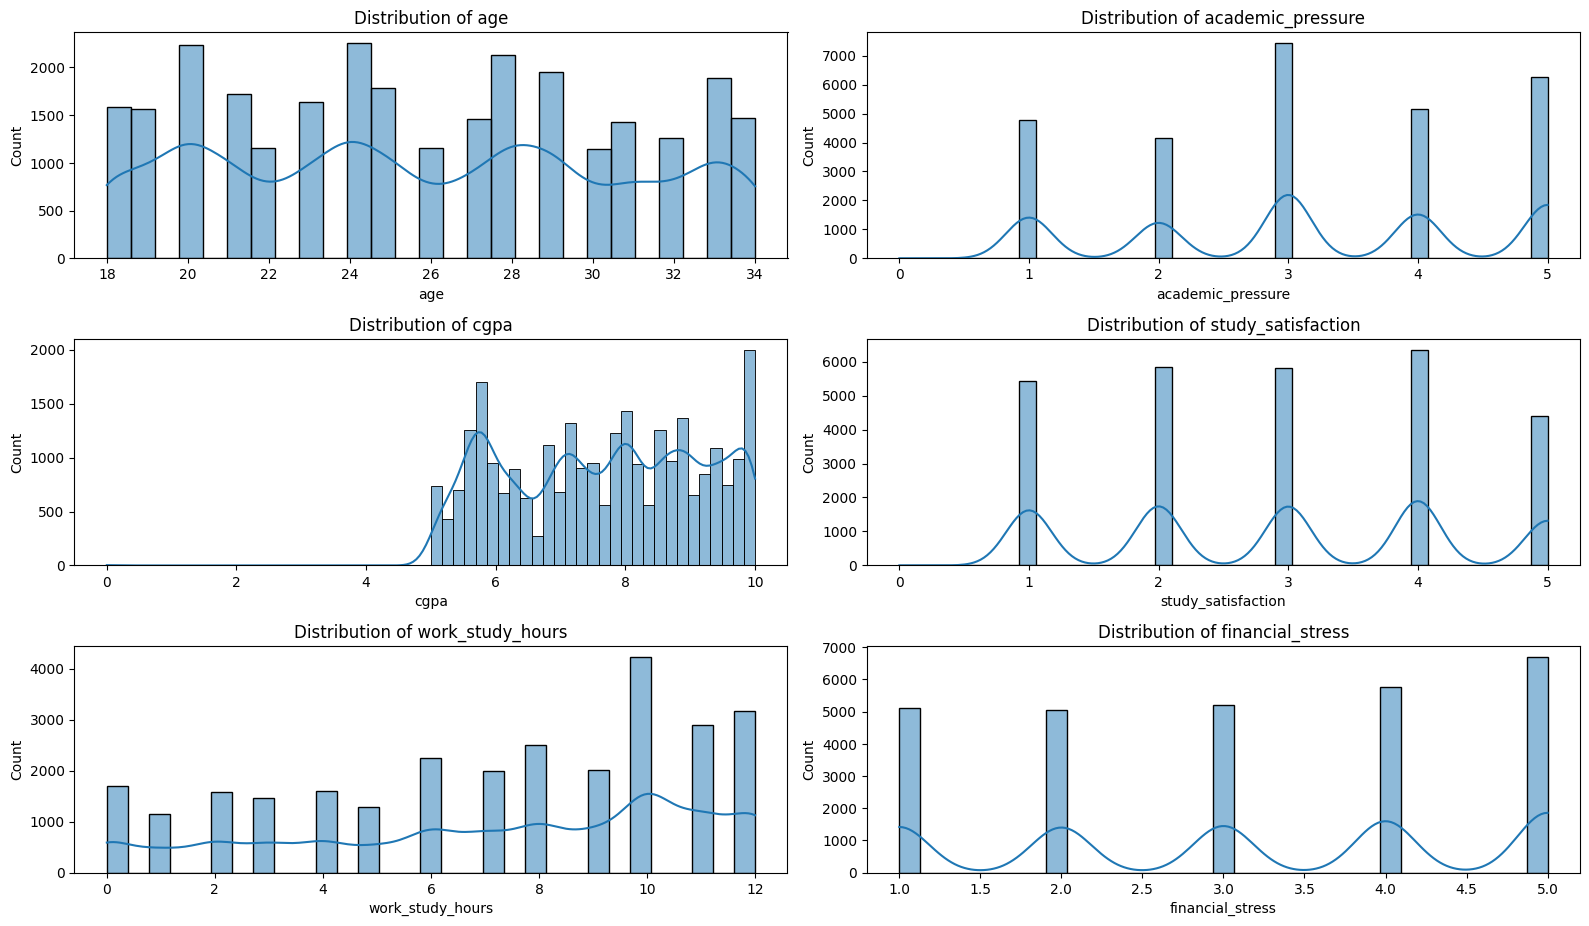

In [474]:
plt.figure(figsize=(16,12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()    


*11.3 Boxplots for Outlier Detection*

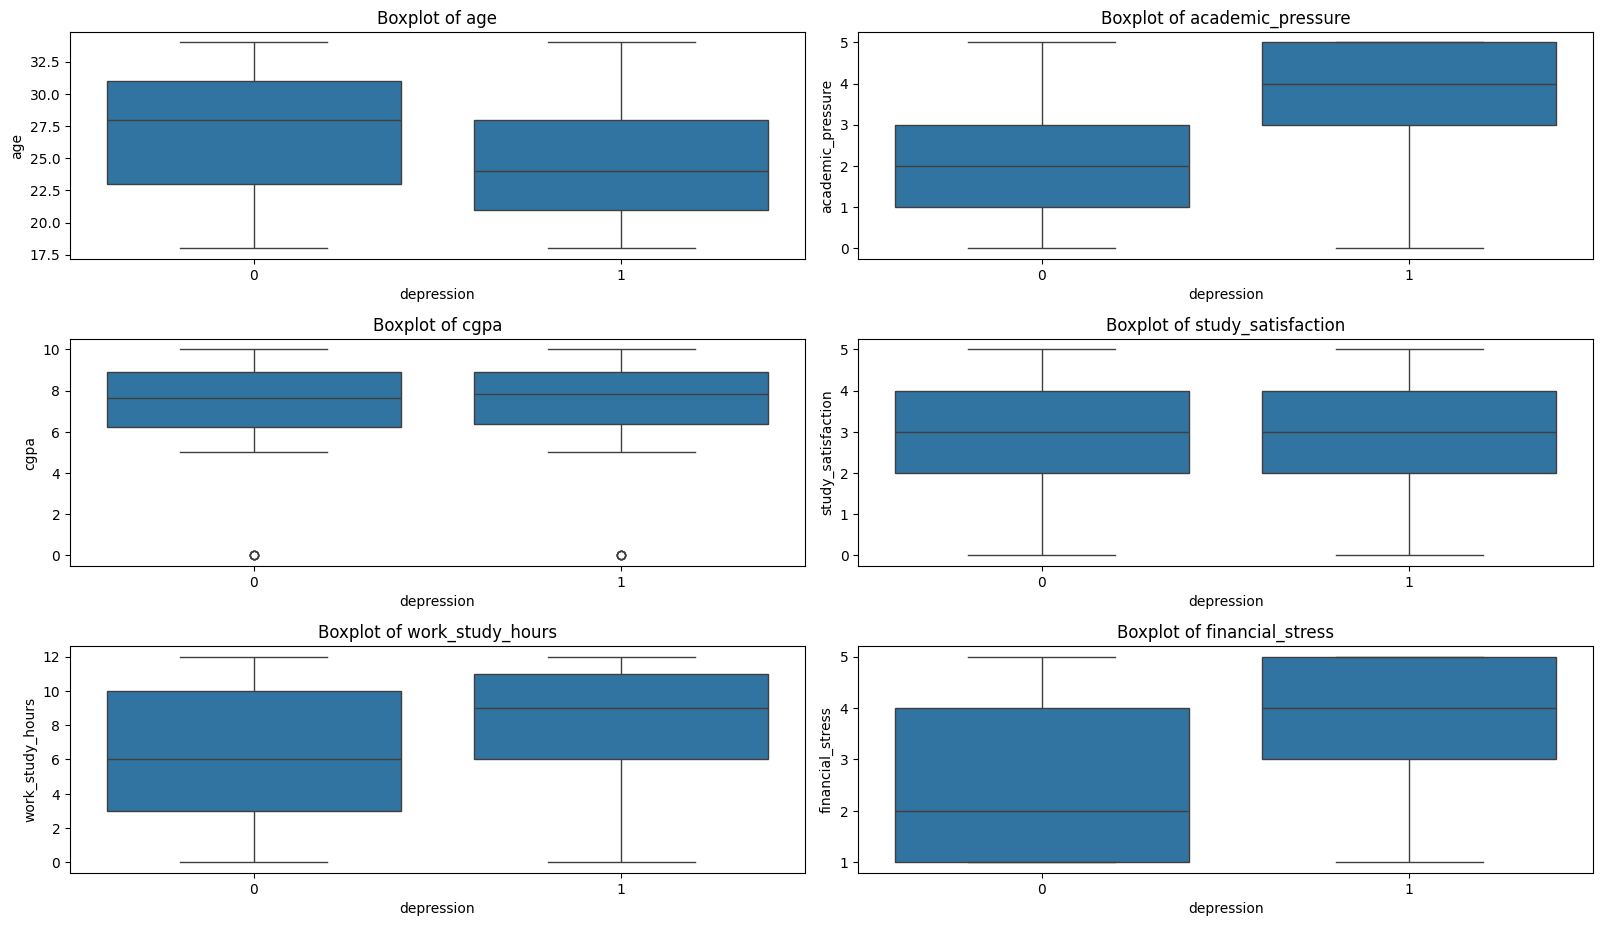

In [475]:
plt.figure(figsize=(16,12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.boxplot(x='depression',y=col,data=df)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

*11.4 Correlation Heatmap(For Numerical Features)*

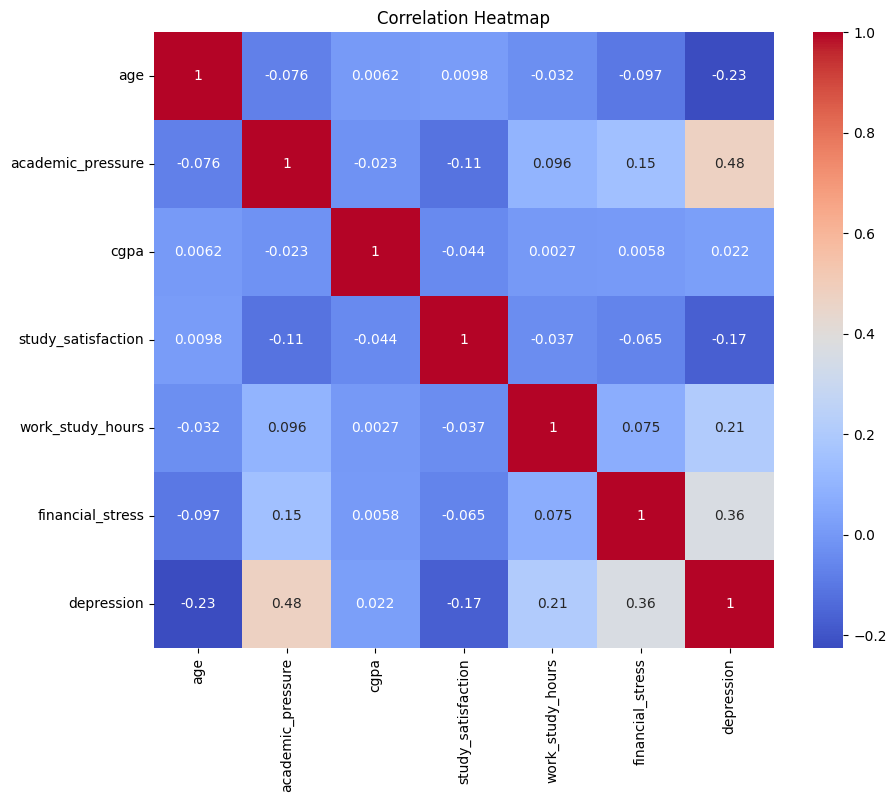

In [476]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols+[target]].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

*11.5 Categorical Feature Counts*

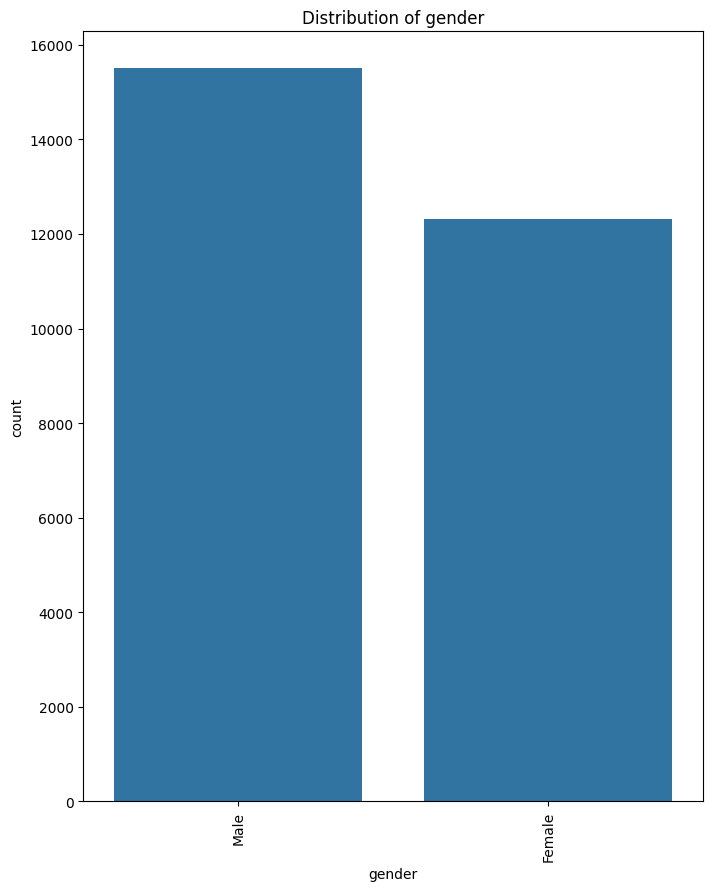

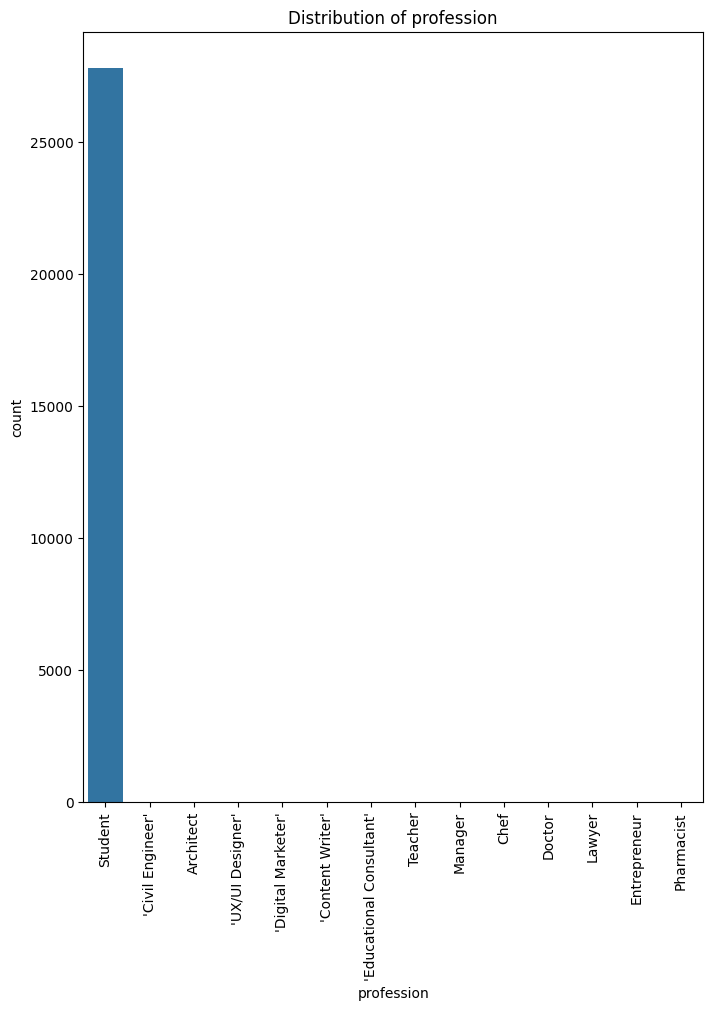

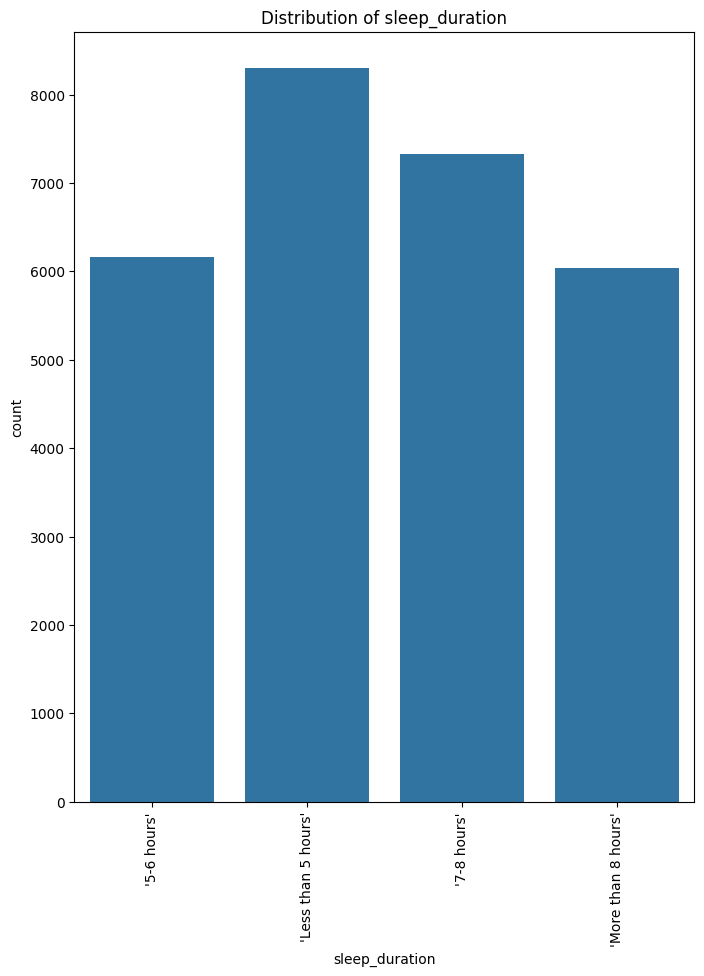

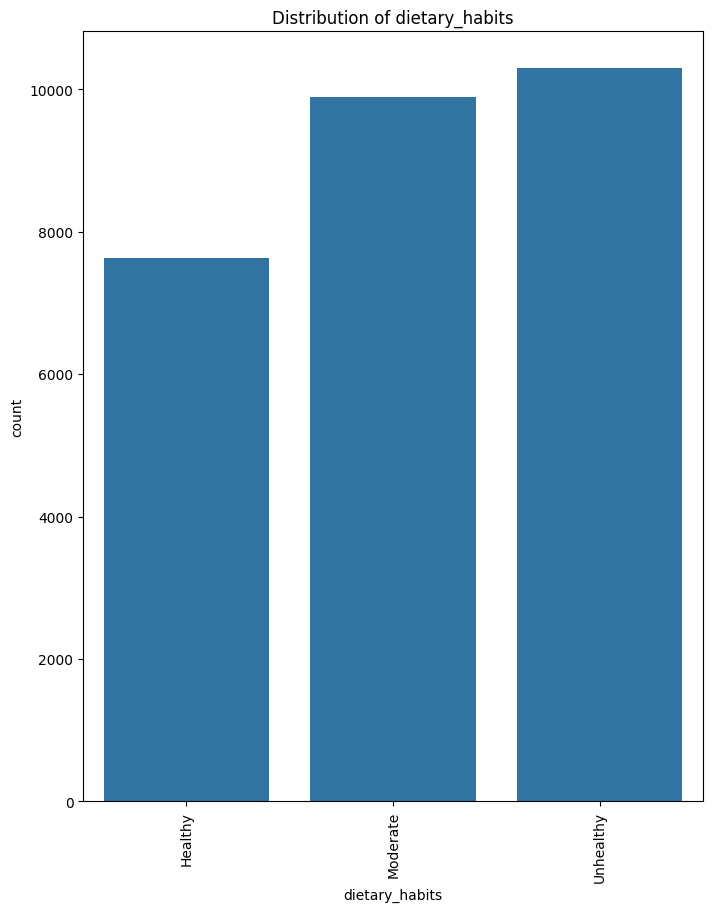

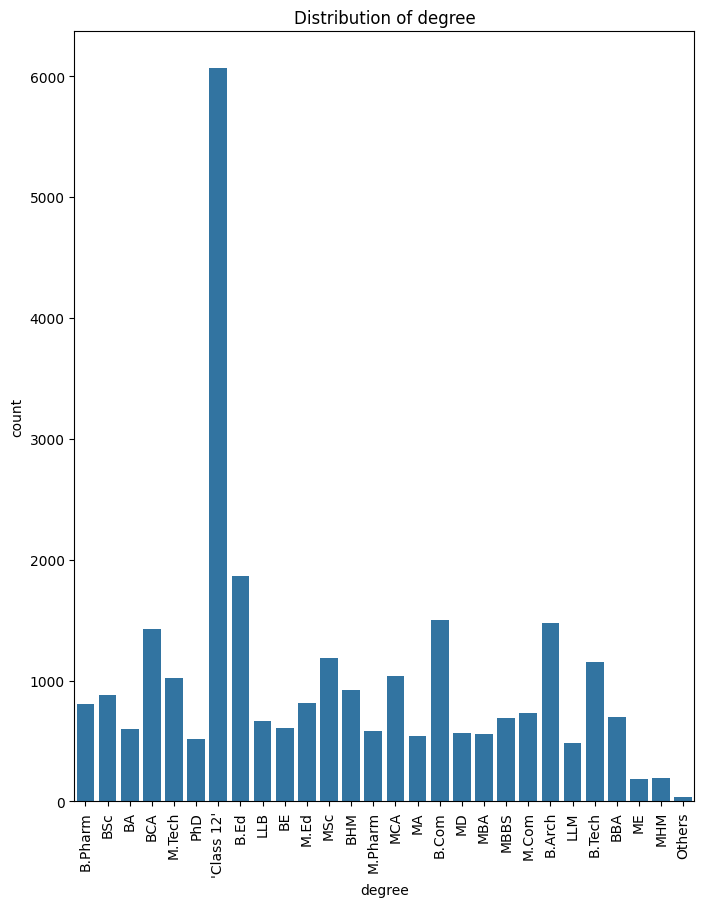

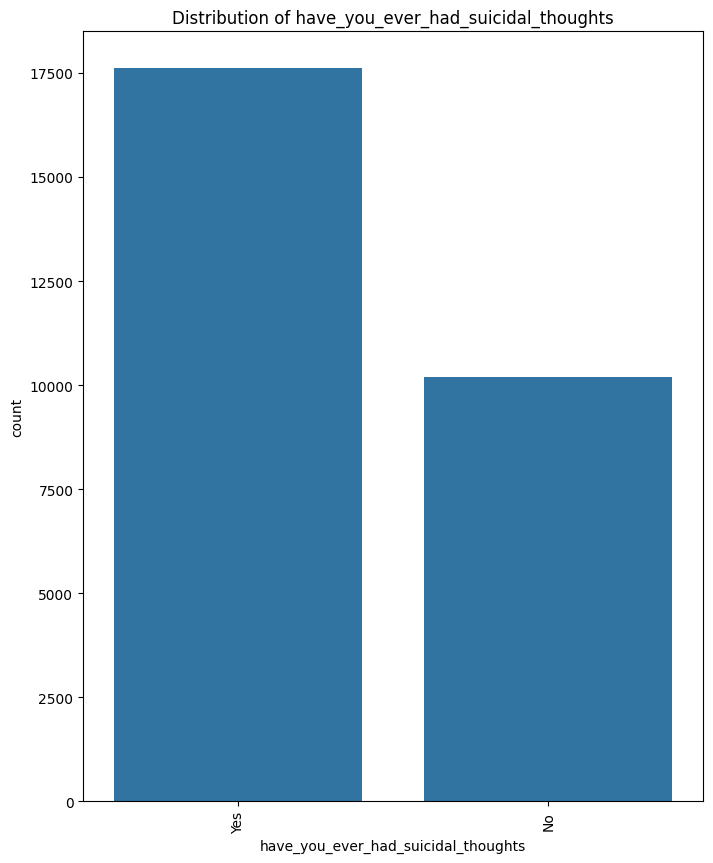

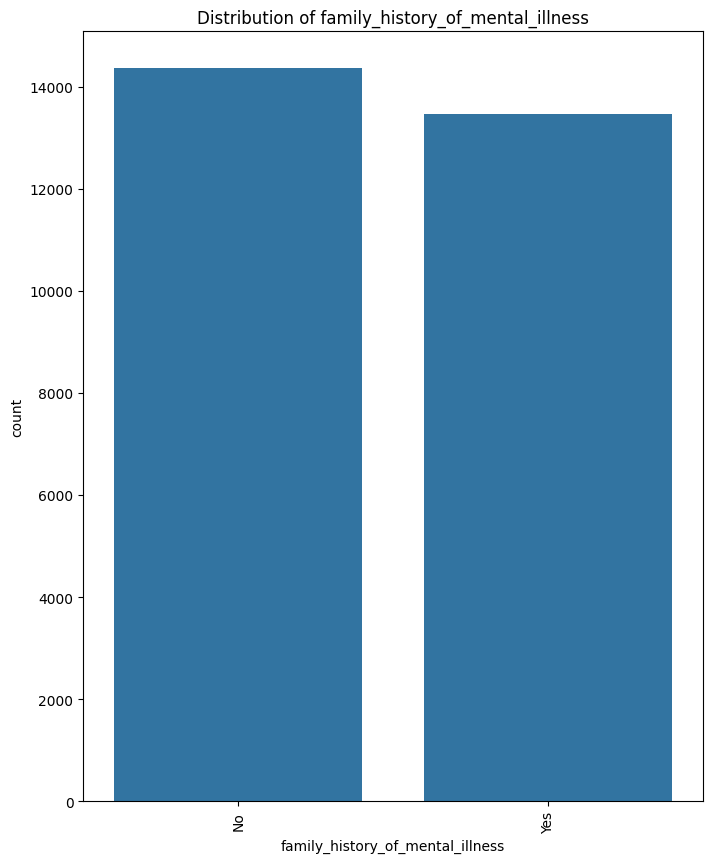

In [477]:
for col in categorical_cols:
    plt.figure(figsize=(8,10))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

***12.Convert Original Range columns to Numeric***

Columns like 'Sleep Duration' contain rages which are strings. So, we need to map them to numerical values.

In [478]:
sleep_map = {
    'less than 5 hours':0,
    '5-6 hours':1,
    '7-8 hours':2,
    'more than 8 hours':3
}

df['sleep_duration']=df['sleep_duration'].map(sleep_map)




***13.Save Cleaned Dataset***

In [480]:
#Save Cleaned Dataset
output_path="Data/processed/FC110543_SarasiPerera/clean_dataset.csv"

#Ensure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the cleaned dataset without the index
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to:{output_path}")

Cleaned dataset saved to:Data/processed/FC110543_SarasiPerera/clean_dataset.csv
